In [1]:
import zipfile
import os

In [2]:
zip_path = r"C:\Users\ms864\archive (4).zip"
extract_path = r"C:\Users\ms864\Downloads\Machine learning pipeline\extracted_files"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')



In [4]:
os.makedirs(extract_path , exist_ok=True)

In [5]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
print("Files in extracted folder:", os.listdir(extract_path))


Files in extracted folder: ['college_student_placement_dataset.csv']


In [7]:
csv_path = os.path.join(extract_path, "college_student_placement_dataset.csv")

In [19]:
df = pd.read_csv(csv_path)
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [9]:
#initial checks
print(df.shape)
print(df.info())
print(df.describe())    
print(df.isnull().sum()) 
print(df.duplicated().sum()) 




(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None
                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800    

In [10]:
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Placed': 1, 'Not Placed': 0})
print(df.head())
print(df.dtypes)


  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

   Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                      0                       8                     8   
1                      0                       7                     8   
2                      0                       3                     1   
3                      1                       1                     6   
4                      0                       8                    10   

   Projects_Completed  Placement  
0                   4        NaN  
1                   0        NaN  
2                   1        NaN  
3                 

In [11]:
# Statistical Analysis
cgpa = df['CGPA'].values  

np.mean(cgpa)     
np.median(cgpa)   
np.std(cgpa)      
np.var(cgpa)       
np.min(cgpa)      
np.max(cgpa)      
np.percentile(cgpa, 50) 


np.float64(7.55)

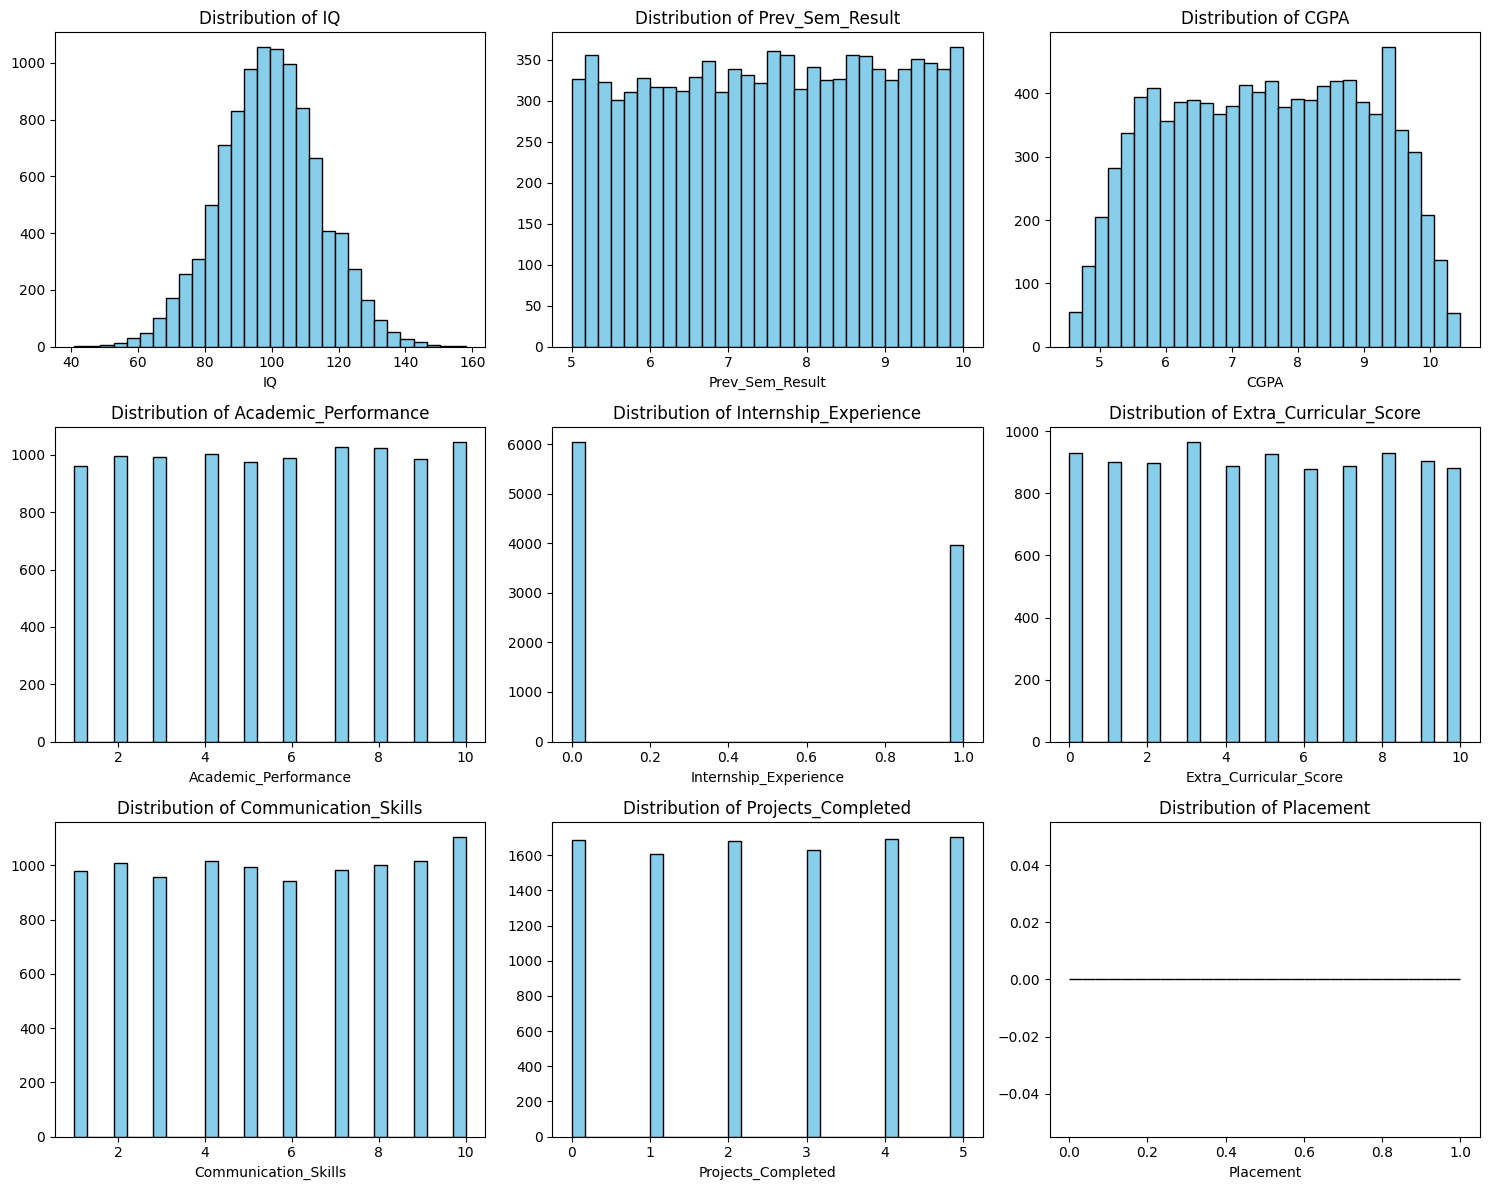

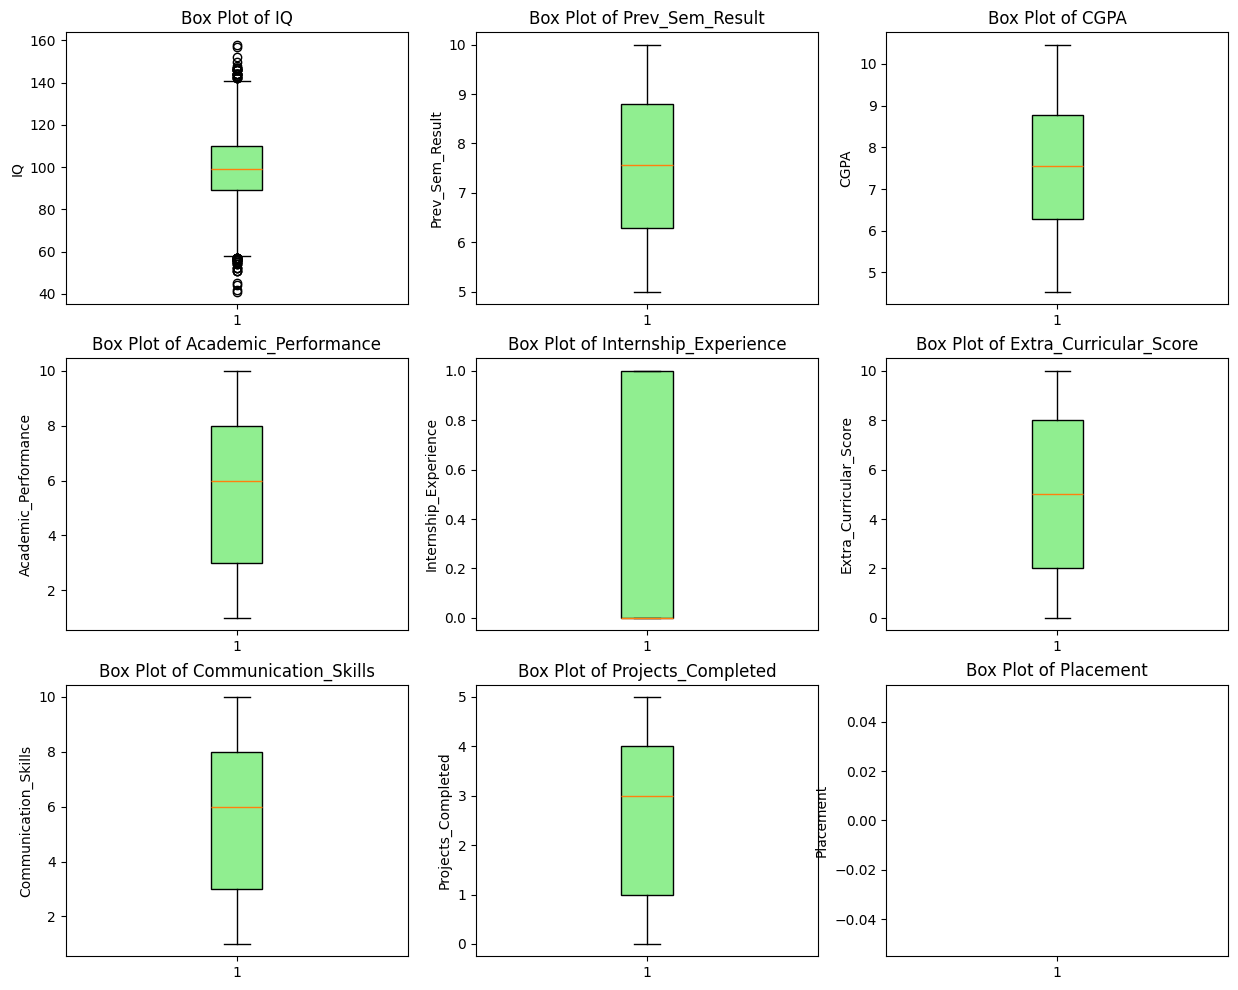

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))

#  histogram graph
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    data = pd.to_numeric(df[col], errors='coerce').dropna()  # convert & remove NaNs
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()
# Box plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):   
    plt.subplot(3, 3, i)
    data = pd.to_numeric(df[col], errors='coerce').dropna()  # convert & remove NaNs
    plt.boxplot(data, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)



In [13]:
X = df.drop('Placement', axis=1)  
y = df['Placement']           
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (10000, 9)
Target shape: (10000,)


In [14]:
print(X.dtypes)
print(X.select_dtypes(include='object').head())

X = pd.get_dummies(X, drop_first=True)
print(X.head())


College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience       int64
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
dtype: object
  College_ID
0    CLG0030
1    CLG0061
2    CLG0036
3    CLG0055
4    CLG0004
    IQ  Prev_Sem_Result  CGPA  Academic_Performance  Internship_Experience  \
0  107             6.61  6.28                     8                      0   
1   97             5.52  5.37                     8                      0   
2  109             5.36  5.83                     9                      0   
3  122             5.47  5.75                     6                      1   
4   96             7.91  7.69                     7                      0   

   Extra_Curricular_Score  Communication_Skills  Projects_Completed  \
0                       8                     8               

In [15]:
#splitting data
X = df.drop('Placement', axis=1)
y = df['Placement']    
#DROPPING NON-NUMERIC COLUMNS
X = df.drop('Placement', axis=1)
X = X.select_dtypes(include=['int64', 'float64'])  # keep only numeric






In [16]:
#MIN-MAX NORMALIZATION
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
#MODEL TRAINING, TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7000, 8)
X_test shape: (3000, 8)
y_train shape: (7000,)
y_test shape: (3000,)
